First we set the page width for jupyter notebook.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Now we import matplotlib, numpy, interactive and widgets. Additionally, we set the backend of matplotlib to the inline setting.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, widgets
%matplotlib inline

Now, we establish a function func(x) which we will name fun to be called in our other functions. This can be changed to study other objective functions.

In [3]:
def fx_fun(xi):
    from numpy import asarray
    x1=xi[0]
    x2=xi[1]
    #y= -(2*xi[0]+3*xi[1]-xi[0]**3-2*xi[1]**2);
    #y=0.5*xi[0]**2+xi[1]**2-xi[0]*xi[1]-7*xi[0]-7*xi[1];
    y=10*x1**4-(20*x1**2)*x2+10*x2**2+x1**2-2*x1+5
    dydx1=40*x1**3 - 40*x1*x2 + 2*x1 - 22;
    dydx2=-20*x1**2 + 20*x2;
    df= asarray([dydx1,dydx2])
    return y,df

In [4]:
def gx_fun(x):
    from numpy import transpose
    x1=x[0]
    x2=x[1]
    g1=-2-x1
    g2=x1-.5
    g3=-0.5-x2
    g4=x2-4.5
    g=[g1,g2,g3,g4]
    dg1dx=[-1, 1, 0, 0]
    dg2dx=[0, 0, -1, 1]
    dg=transpose([dg1dx,dg2dx])
    h=[]
    dh=[]
    return g,dg#,h,dh

Now, we establish a function to return the value of the function fun(x) along with it's derivative dy at the input point xi. The derivative for this case is defined analytically. Issues arose when using the finite difference methodology.

In [5]:
def fun(xi):
    from numpy import arange,append,transpose,asarray
    #y= -(2*xi[0]+3*xi[1]-xi[0]**3-2*xi[1]**2);
    y=func(xi)
    #dy=[]
    #dx=0.000000001
    #k=arange(1,len(xi)+1,1)
    ##print(k)
    #for i in k:
    #    xtemp=xi[:]
    #    xtemp[i-1]=xtemp[i-1]+dx
    #    ytemp=func(xtemp)
    #    ydif=ytemp-y
    #    a = (ydif)/dx
    #    dy=append(dy,a)
    #dy=asarray([-2+3*xi[0]**2,-3+4*xi[1]])
    #dy= asarray([xi[0]-xi[1]-7,2*xi[1]-xi[0]-7])
    #dy=asarray([(40*xi[0]**3) - (40*xi[0]*xi[1]) + 2*xi[1] - 22,(-20*xi[0]**2) + 20*xi[1]])
    return y,dy


Next, we will establish a function func_a which will define the search function along its path.

In [6]:
def func_a(fun,dk,xk,ai):
    from numpy import asarray
    xi = xk + ai*asarray(dk)
    fi= fun(xi)
    return fi

Now, we will establish a function to search for the upper and lower bounds of our search. If this domain contains the function minimum then the while loop will break.

In [7]:
def bound_search(fun,xk,dk,LB,UB,delta):
    from numpy import arange
    from numpy import asarray
    as1= arange(LB,UB,delta)
    q=1
    aq=as1[q]
    xq=xk+asarray(dk)*aq
    yq1=func_a(fun,dk,xk,aq)
    while 1:
        q=q+1;
        aq=as1[q]
        yq2 = func_a(fun,dk,xk,aq)
        if yq1<yq2:
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
            
        if q==len(as1)-1:
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
        yq1=yq2
    return (new_LB,new_UB)

Now, a function lscov to replace functionality of lscov in matlab is established

In [8]:
def lscov(A, B, w=None):
    
    if w is None:
        Aw = A.copy()
        Bw = B.T.copy()
    else:
        W = np.sqrt(np.diag(np.array(w).flatten()))
        Aw = np.dot(W, A)
        Bw = np.dot(B.T, W)

    x, residuals, rank, s = np.linalg.lstsq(Aw, Bw.T, rcond=1e-10)
    return np.array(x).flatten()

Now, we will establish a function to impliment the line search method. The bounds are searched iteratively until they are within a tolerance epsilon value

In [9]:
#from matplotlib import *
def line_search_equal_interval(fun, xk, dk):

    from numpy import arange
    from numpy import append
    #from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks
    #%matplotlib inline
    UB=10
    LB=0
   
    delta = .05
    r = .2
    epsilon_tolerance2 = .00001
    aopt_found = 0
    iter1 = 1
   
    
    while not (aopt_found == 1):
        (new_LB, new_UB) = bound_search(fun, xk, dk, LB, UB, delta)
        if abs(new_UB - new_LB) < epsilon_tolerance2:
            aopt_found = 1;
        delta = r * delta
        LB = new_LB
        UB = new_UB
        
        iter1 = iter1 + 1
        a_opt = (new_UB + new_LB) / 2
   

    return a_opt

Now, we will establish a function to impliment the golden line search and return its optimum search direction 

In [10]:
def golden_search(fx_fun,gx_fun,xk,dk):
    import math
    from numpy import arange,append,asarray,sum
     
    LB=-10
    UB=10  
    delta=.01
    etol =.0001
    r=(1+math.sqrt(5))/2
    ir=1/r
    at=arange(LB,UB,delta)
    xas=[]
    yts=[]
    sn = len(at)
    sn = arange(0, sn, 1)
    iterations=0
    
    for i in sn:
        fi = func_a(fun,dk,xk,at[i])
        yts = asarray(append(yts,fi))
    ymin=min(yts)   
    ymax=max(yts)
    
    a0=delta
    f0=func_a(fun,dk,xk,a0)
    a1=delta+delta*r
    f1=func_a(fun,dk,xk,a1)
    id1=2
 
    
    while 1:
        a2 = delta*sum(r**asarray(arange(0,id1,1)))
        f2 = func_a(fun,dk,xk,a2)
        if (f0>f1) & (f1<f2):
            break
        else:
            id1=id1+1
            a0=a1
            a1=a2
            f0=f1
            f1=f2
    
    ##phase 2
    
    
    aL=a0
    aA=a1
    aU=a2
    fL=f0
    fA=f1
    fU=f2
      
    
    Intv0=aU-aL
    aB=aL+ir*Intv0
    fB=func_a(fun,dk,xk,aB)
    
   
            
    while 1:

        
        if (fA<fB):
            aL=aL
            aU=aB
            aB=aA
            fL=fL
            fU=fB
            fB=fA
            Intv1=aU-aL
            aA=aL+(1-ir)*Intv1
            fA=func_a(fun,dk,xk,aA)
        else:
            aL=aA
            aU=aU
            aA=aB
            fL=fA
            fU=fU
            fA=fB
            Intv1=aU-aL
            aB=aL+ir*Intv1
            fB=func_a(fun,dk,xk,aB)
        if (abs(Intv1-Intv0) < etol):
            break
        else:
            Intv0=Intv1
        iterations=iterations+1
    a_opt = (aU+aL)/2
    f_opt = (fU+fL)/2
    return a_opt

Now, we establish a steepest descent function and a ex10_25_fx_graphic() function:

In [11]:
def ex10_25_fx_graphic():
    from numpy import arange,meshgrid
    
    xs=arange(-4.5,4.5,.01)
    [x1,x2]=meshgrid(xs,xs)
    f=func([x1,x2])
    fig,ax=plt.subplots()
    CS=ax.contour(x1,x2,f,1000,cmap='Spectral')
    plt.colorbar(CS)
    plt.xlabel('x1',fontsize=24)
    plt.ylabel('x2',fontsize=24)
    fig.set_size_inches(18.5, 10.5) 

We now establish the function to return the optimal search direction for the armijio method.

In [12]:
def line_search_armijo(fun,xk,dk):
    from numpy import linspace,asarray,append,arange
    LB=0
    UB=1
    
    as1=linspace(0,1,30)
    sn =arange(0,len(as1),1)
    yts=[]
    
    for i in sn:
        fi = func_a(fun,dk,xk,as1[i])
        yts = asarray(append(yts,fi))
                
    nita=2
    rho=.8
    ai=.01
    forwardcase=1
    k=0
    da=0.00001
    fo=func_a(fun,dk,xk,0.0)
    f0_da=func_a(fun,dk,xk,da)
    dfo=(f0_da-fo)/da    
    fa=func_a(fun,dk,xk,ai)
    qa=fo+rho*dfo*ai
    
    
    if (fa>qa):
        nita=1/nita
        ai=nita*ai
        forwardcase=0
    k=1
    
    while 1:
        
        fa=func_a(fun,dk,xk,ai)
        #print("fa:"+str(fa))
        qa=fo+ rho*dfo*ai
        
        if (fa>qa) & forwardcase:
            break
        if (fa<qa) & ~forwardcase:
            break
            
        ai=nita*ai
        k=k+1
    a_opt=ai
    return a_opt

We now establish a function to perform the polynomial line search.

In [13]:
def polynomial_line_search(fun,xk,dk):
    from numpy import linspace,arange,append,transpose
    aL=0
    aU=2
    aI=(aL+aU)/2
    etol=0.00001
    at=linspace(0,3,30)
    yts=[]
    k=0
  
    sn = arange(0, len(at), 1)
    
    
    for i in sn:
        fi = func_a(fun,dk,xk,at[i])
        yts = append(yts,fi)
        #print("yts:"+str(yts))
    fU=func_a(fun,dk,xk,aU)
    fL=func_a(fun,dk,xk,aL)
    fI=func_a(fun,dk,xk,aI)
    a_bar_old=aL
    #print("aold:"+str(a_bar_old))
    
    while 1:
        k=k+1
        #print("loop "+str(k))
        X=[[1, aL, aL**2],[1,aU,aU**2],[1,aI,aI**2]]
        Y=append(append(fL,fU),fI)
        #print("Y: "+str(Y))
        a=lscov(X,Y)
        #print("a:"+str(a))
        a0=a[0]
        a1=a[1]
        a2=a[2]
        #print("a0: "+str(a0)+'\na1: '+str(a1)+'\na2: '+str(a2))
        a_bar_new=-a1/(2*a2)
        #print("a_bar_new:"+str(a_bar_new))
        f_abar=func_a(fun,dk,xk,a_bar_new)
        #print("f_abar:"+str(f_abar))
        
        
        if aI<a_bar_new:
            
            if fI<f_abar:
                
                aU=a_bar_new
                fU=f_abar
            else:
                aL=aI
                fL=fI
                aI=a_bar_new
                fI=f_abar
                
        else:
            
            
            if fI<f_abar:
                aL=a_bar_new
                fL=f_abar
            else:
                aU=aI
                fU=fI
                aI=a_bar_new
                fI=f_abar
        a_opt = a_bar_new
        check=abs(a_bar_new-a_bar_old)
        #print("check:"+str(check))
        if (check<etol):
            break
            
        
        a_bar_old = a_bar_new
        #print("a_bar_old:"+str(a_bar_old))
    
    
    return a_opt
        

We now establish a function to define the steepest descent method and perform it using equal interval, golden section, armijo, and polynomial line search methodologies

In [14]:
def steepest_descent(method):
    import time
    start=time.perf_counter()
    from numpy import linalg,transpose,arange,meshgrid,append,asarray
    xka=[]
    xkx=[]
    xky=[]
    x0=[-1,3.5]
    k=0
    epsilon_tol1=.01
    xk=x0[:]
    
    xka=append(xka,xk[:])
    iter=0
    while 1:
        
        
        iter=iter+1;
        #print("xk_"+str(k)+': '+str(xk))
        y,dy=fun(xk)
        ck=dy
        #print('dy:'+str(dy))
        
        
        
        
        if (linalg.norm(ck)<epsilon_tol1):
            stop=time.perf_counter()
            print('break occured after '+str(iter)+" iterations",end=", ")
            print("Final xk:"+str(xk))
            if method==1:
                print('line search section method used')
            elif method==2:
                print('golden section search method used')
            elif method==3:
                print('armijo section search method used')
            elif method==4:
                print('polynomial line search method used')
            break
        
        dk=-ck
        
        
        if method==1:
            a_opt=line_search_equal_interval(func, xk, dk)
        elif method==2:
            a_opt=golden_search(func,xk,dk)
        elif method==3:
            a_opt=line_search_armijo(func,xk,dk)
        elif method==4:
            a_opt=polynomial_line_search(func,xk,dk)
        else:
            print("not a proper input")
            
        #print("a_opt: "+str(a_opt))
        xk=xk+dk*a_opt
        xka=append(xka,xk[:])
       
        
        k=k+1
        
    #print("xka:"+str(xka))
    
    for i in arange(0,len(xka),2):
        xkx=append(xkx,xka[i])
    #print("xkx:"+str(xkx))
    for i in arange(1,len(xka),2):
        xky=append(xky,xka[i])
    #print("xky:"+str(xky))
    
    elapsed=stop-start
    print(str(elapsed)+" seconds calculation time")   
    ex10_25_fx_graphic()
    #CS= plt.scatter(xka[0],xka[1])
    CS= plt.scatter(xkx,xky,cmap='binary',c=xkx)
    CS= plt.plot(xkx,xky,'b--',linewidth=2)
    if method==1:
        plt.title("equal interval line search with steepest descent method",fontsize=24)
    elif method==2:
        plt.title("golden section line search method with steepest descent method",fontsize=24)
    elif method==3:
        plt.title("armijo line section search method with steepest descent method",fontsize=24)
    elif method==4:
        plt.title("polynomial interpolation search method with steepest descent method",fontsize=24)
    plt.show()
    
    

In [68]:
def SLP(fx_fun,gx_fun):
    import matplotlib.pyplot as plt
    from numpy import arange,meshgrid,zeros,matrix,asarray,transpose,amax,amin,ones,dot,linalg,append
    from scipy.optimize import linprog
    from matplotlib.pyplot import xlim,ylim,legend,title,xlabel,ylabel
    xs1=arange(-3.5,4.5,.1)
    [x1,x2]=meshgrid(xs1,xs1)
    a=len(x1)
    b=len(x2)
    f=zeros([a,b])
    g1=zeros([a,b])
    g2=zeros([a,b])
    g3=zeros([a,b])
    g4=zeros([a,b])

    for i in range(a):
        for j in range(b):
            xi=[x1[i,j],x2[i,j]]
            #print("xi:"+str(xi))#really big if unsupressed
            fk,dfk=fx_fun(xi)
            gk,dgk=gx_fun(xi)
            f[i,j]=fk
            g1[i,j]=gk[0]
            g2[i,j]=gk[1]
            g3[i,j]=gk[2]
            g4[i,j]=gk[3]
    fig,ax=plt.subplots()
    CS=ax.contour(x1,x2,f,levels=[4.6,5,7.5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150],cmap='turbo')
    colorbar=plt.colorbar(CS)
    colorbar.set_label("Objective Function Value",fontsize=24)
    ax.clabel(CS,CS.levels,inline=True,fontsize=12)
    cv1=asarray([0.001, 0.0011])
    cv1=cv1*amax(g1)
    ax.contour(x1,x2,g1,cv1,cmap='Greys')
    cv2=asarray([0.001, 0.0011])*amax(g2)
    ax.contour(x1,x2,g2,cv2,cmap='Greys')
    cv3=asarray([0.001, 0.0015])*amax(g3)
    ax.contour(x1,x2,g3,cv3,cmap='Greys')
    cv4=asarray([0.05, 0.0499])*amin(g4)
    ax.contour(x1,x2,g4,cv4,cmap='Greys')
    fig.set_size_inches(14*1.2, 9*1.2) 
    xlim([-2.5,1])
    ylim([-1,4.25])
    DVn=2
    xk=transpose([-1,3.5])
    tol=.0001
    k=0
    iterN=int(0)
    iter_x_history=[]
    iter_y_history=[]
    iter_g_history=[]

    ML=.1
    old_dxp=xk
    #print("xk:"+str(xk))
    c=.5
    dxp=[0,0]
    while 1:


        iterN=iterN+1
        fk,dfk=fx_fun(xk)
        gk,dgk=gx_fun(xk)
        #print("fk:"+str(fk))
        #print("dfk:"+str(dfk))
        #print("gk:"+str(gk))
        #print("dgk:"+str(dgk))

        iter_x_history=append(iter_x_history,xk[0])
        iter_y_history=append(iter_y_history,xk[1])
        iter_g_history=append(iter_g_history,gk)
        #scatter3 from matlab code not here because of matplotlib loop plotting issue encountered values are instead stored then plotted after while loop.
        ci=asarray(dfk)
        A=asarray(dgk)
        b=-asarray(gk)
        #print("ci:"+str(ci))
        #print("A:"+str(A))
        #print("b:"+str(b))

        dxp_previous=dxp[:]
        bound1=(-.1,.1)
        #print("bound1:"+str(bound1))
        bound2=(-.1,.1)
        #print("bound2:"+str(bound2))
        res=linprog(ci,A_ub=A,b_ub=b,\
                    method='revised simplex',bounds=(bound1,bound2))#,options={"disp":True})
        #print("res:"+str(res))
        #break
        dxp=res["x"]
        fval=res["fun"]
        #print("fval:"+str(fval))
        #print("dxp:"+str(dxp))
        xlp=xk+dxp
        xk=xlp[:]
        #print("xk:"+str(xk))
        angle=dot(old_dxp,dxp)/linalg.norm(old_dxp)*linalg.norm(dxp)
        #print("angle:"+str(angle))
        
        if angle<-.8:
            ML=ML*c
        if ML<tol or iterN>100:
            break

    f_opt=fx_fun([xk[0],xk[1]])
    #print(f_opt[0])
    #print(iter_x_history)        
    ax.scatter(iter_x_history,iter_y_history,color='blue')
    ax.plot(iter_x_history,iter_y_history,color='grey',label='Search Path')
    ax.scatter(iter_x_history[0],iter_y_history[0],color='green',label='Starting $x_k$')
    ax.scatter(xk[0],xk[1],color='red',label='Optimum Design Point\n ['+str(xk[0])+", "+str(round(xk[1],5))+'] at f='+str(round(f_opt[0],5))+'\nConverged after '+str(iterN)+' loops')
    legend(loc=3,fontsize=24)
    title("Sequential Linear Programming Method Python Implementation",fontsize=24,pad=10)
    xlabel("$x_1$ value",fontsize=24)
    ylabel("$x_2$ value",fontsize=24);
    #print(iter_x_history)
    #print(iter_y_history)
    #print("xk:"+str(xk))
    xk_final=[xk[0],xk[1]]
    return f_opt,xk_final

((4.275000000000002, array([-20.,  -1.])), [0.5, 0.19999999999999804])

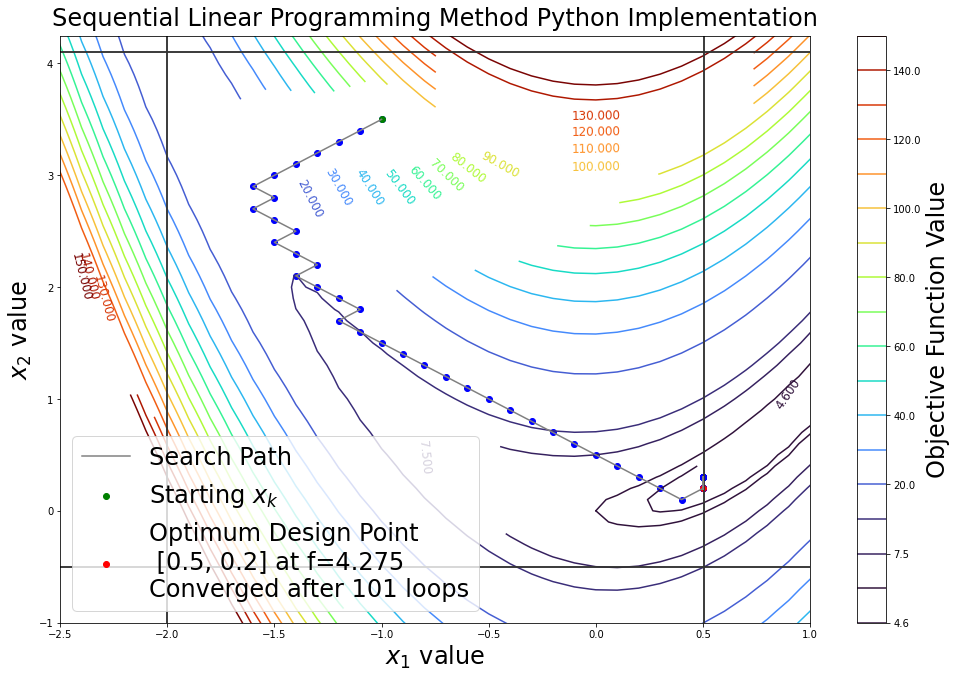

In [69]:
SLP(fx_fun,gx_fun)